In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr
from sklearn.metrics import log_loss


Averaged Accuracy: 0.5178571428571428
Average Log-Loss: 0.6934909040819721

Fold 1 - Confusion Matrix:
 [[4 0]
 [4 0]]

Fold 1 - Classification Report:
               precision    recall  f1-score   support

       False       0.50      1.00      0.67         4
        True       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8


Fold 2 - Confusion Matrix:
 [[4 0]
 [4 0]]

Fold 2 - Classification Report:
               precision    recall  f1-score   support

       False       0.50      1.00      0.67         4
        True       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8


Fold 3 - Confusion Matrix:
 [[4 0]
 [4 0]]

Fold 3 - Classification Report:
               precision    recall  f1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Pre

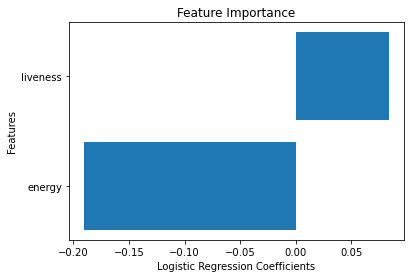

[-0.19029561  0.0833661 ]


In [18]:
df = pd.read_excel("data_data.xlsx")

x=df[["energy", "liveness"]]
energy = df["energy"]
liveness= df["liveness"]
y_continuous=df["popularity"]
y_boolean =[]

for element in y_continuous:
    if element>74 :
        variable=True
        y_boolean.append(variable)
    else:
        variable=False
        y_boolean.append(variable)

        
dict = {"energy": energy, "liveness": liveness, "is_popular": y_boolean}
data = pd.DataFrame(dict)
y = pd.DataFrame(y_boolean)

k = 4
kf = KFold(n_splits=k, random_state=42, shuffle=True)

log_reg_model = LogisticRegression(solver="liblinear")

accuracies = []
conf_matrices = []
class_reports = []

log_losses = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_reg_model.fit(x_train, y_train)

    y_pred_prob = log_reg_model.predict_proba(x_test)
    y_pred = log_reg_model.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    fold_log_loss = log_loss(y_test, y_pred_prob)
    log_losses.append(fold_log_loss)

print("Averaged Accuracy:", np.mean(accuracies))
print("Average Log-Loss:", np.mean(log_losses))

#Output the confusion matrices and classification reports for each fold
for i in range(k):
    print(f"\nFold {i+1} - Confusion Matrix:\n", conf_matrices[i])
    print(f"\nFold {i+1} - Classification Report:\n", class_reports[i])
    
    
feature_importance = log_reg_model.coef_[0]
plt.barh(x.columns, feature_importance)
plt.xlabel("Logistic Regression Coefficients")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()
plt.close()
print(feature_importance)
